# Airline Customer Segmentation based on LRFMC Model
Filzahanti Nuha Ramadhani

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Dataset source : https://www.programmersought.com/article/48113472881/<br>
Customers are segmented based on membership length,  recency, frequency, monetary, and discount coefficient.
- Membership length (L):
The total months of membership of each customer
- Recency (R):
The number of months between the latest flight the customers took until the end of the observation
- Frequency (F):
The total flights taken by each customer
- Monetary (M):
In this case, the monetary is replaced by the total kilometers of the customers' flights
- Discount coefficient (C):
The average discount rate<br>

<b> Reference: </b><br>
Tao, Y. (2020). Analysis Method for Customer Value of Aviation Big Data Based on LRFMC Model. ICPCSEE.<br>

## Load Dataset

In [2]:
df = pd.read_csv('1670425821097-flight.csv')

In [3]:
df.sample(5).transpose()

,7392,60510,36013,29073,51758
MEMBER_NO,2500,54127,15620,979,30755
FFP_DATE,7/22/2007,11/1/2010,7/24/2012,12/21/2006,1/14/2011
FIRST_FLIGHT_DATE,7/22/2007,7/19/2013,7/24/2012,3/6/2007,3/20/2011
GENDER,Male,Male,Female,Male,Female
FFP_TIER,4,4,4,4,4
WORK_CITY,TEMPE AZ,guangzhou,shanghai,wuhan,SEOUL
WORK_PROVINCE,NaN,guangdong,shanghai,hubei,SEOUL
WORK_COUNTRY,US,CN,CN,CN,KR
AGE,56.0,58.0,34.0,41.0,41.0
LOAD_TIME,3/31/2014,3/31/2014,3/31/2014,3/31/2014,3/31/2014


## Data Preparation

### Data Cleaning

In [4]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [5]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


Delete rows with abnormal date.

In [6]:
df = df.drop(df[df['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00'].index)

Delete rows with missing values in SUM_YR_1 (fare revenue) and SUM_YR_2 (votes prices) columns.

In [7]:
df = df.dropna(subset=['SUM_YR_1','SUM_YR_2'])

Discard rows if the fare and prices is zero but the total flight distance is not 0.

In [8]:
df = df[~((df['SUM_YR_1']==0) & (df['SUM_YR_2']==0) & (df['avg_discount']==0) & (df['SEG_KM_SUM']!=0))]

Convert LOAD_TIME, FFP_DATE, LAST_FLIGHT_DATE, FIRST_FLIGHT_DATE to datetime.

In [9]:
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'])
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'])
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'])
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'])

Use only features needed to segment the customers. Create a new dataframe by copying relevant features (MEMBER_NO, LOAD_TIME, FFP_DATE, LAST_TO_END, FLIGHT_COUNT, SEG_KM_SUM, avg_discount).

In [10]:
df1 = df[['MEMBER_NO','LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']].copy()

In [11]:
df1.head()

,MEMBER_NO,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,54993,2014-03-31,2006-11-02,1,210,580717,0.961639
1,28065,2014-03-31,2007-02-19,7,140,293678,1.252314
2,55106,2014-03-31,2007-02-01,11,135,283712,1.254676
3,21189,2014-03-31,2008-08-22,97,23,281336,1.090870
4,39546,2014-03-31,2009-04-10,5,152,309928,0.970658


### Feature Engineering

Calculate membership length by subtracting FFP_DATE from LOAD_TIME.

In [12]:
df1['L'] = (df1['LOAD_TIME'] - df1['FFP_DATE'])/np.timedelta64(1,'M')

In [13]:
#Drop LOAD_TIME AND FFP_DATE
df1 = df1.drop(['LOAD_TIME','FFP_DATE'], axis=1)
#Change the columns name
df1.columns = ['MEMBER_NO', 'R', 'F', 'M', 'C', 'L']
#Assign other columns except MEMBER_NO to df2 
df2 = df1[['R', 'F', 'M', 'C', 'L']].copy()
cols_name = df2.columns

In [14]:
df2.head()

,R,F,M,C,L
0,1,210,580717,0.961639,88.905316
1,7,140,293678,1.252314,85.324134
2,11,135,283712,1.254676,85.915522
3,97,23,281336,1.090870,67.253948
4,5,152,309928,0.970658,59.664469


### Data Exploration

In [15]:
df2.describe()

,R,F,M,C,L
count,61871.000000,61871.000000,61871.000000,61871.000000,61871.000000
mean,173.732944,11.917587,17249.477801,0.721942,48.850628
std,181.513988,14.094971,21039.298821,0.184938,27.847757
min,1.000000,2.000000,368.000000,0.112043,11.992033
25%,29.000000,3.000000,4840.500000,0.612660,24.115485
50%,107.000000,7.000000,10132.000000,0.711974,41.824267
75%,262.000000,15.000000,21389.000000,0.809284,71.656502
max,731.000000,213.000000,580717.000000,1.500000,112.922237


- All of the features have different standard deviations

## Scaling Features

In [16]:
minmax = MinMaxScaler()
df3 = minmax.fit_transform(df2)

In [17]:
df3 = pd.DataFrame(df3, columns=cols_name)
df3.describe()

,R,F,M,C,L
count,61871.000000,61871.000000,61871.000000,61871.000000,61871.000000
mean,0.236620,0.047003,0.029088,0.439422,0.365189
std,0.248649,0.066801,0.036253,0.133245,0.275911
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.038356,0.004739,0.007707,0.360686,0.120117
50%,0.145205,0.023697,0.016824,0.432240,0.295573
75%,0.357534,0.061611,0.036221,0.502351,0.591146
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Modeling

In [18]:
inertia= []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=100)
    kmeans.fit(df3.values)
    inertia.append(kmeans.inertia_)

<AxesSubplot:>

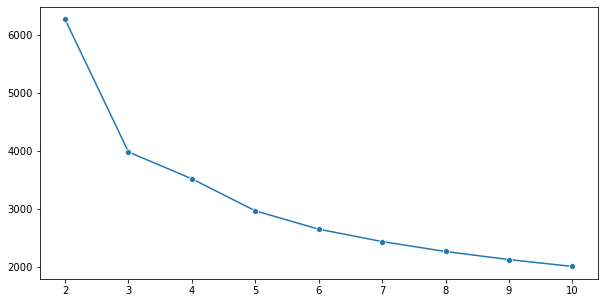

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(2,11), y=inertia, marker='o')

In [20]:
sil_euclid = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i).fit(df3)
    preds = kmeans.predict(df3)
    euclidean = silhouette_score(df3, preds, metric='euclidean')
    print('n_clusters:', i,'. Silhouette score:', euclidean)
    sil_euclid.append(euclidean)

n_clusters: 2 . Silhouette score: 0.3629971528075375
n_clusters: 3 . Silhouette score: 0.4029645044686846
n_clusters: 4 . Silhouette score: 0.38544998170124867
n_clusters: 5 . Silhouette score: 0.3050838318319791
n_clusters: 6 . Silhouette score: 0.28576315219568776
n_clusters: 7 . Silhouette score: 0.29522719175026474
n_clusters: 8 . Silhouette score: 0.25840326135299263
n_clusters: 9 . Silhouette score: 0.258785775344388
n_clusters: 10 . Silhouette score: 0.25757247269975375


<AxesSubplot:>

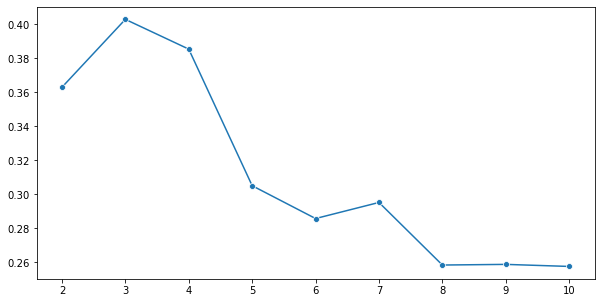

In [21]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(2,11), y=sil_euclid, marker='o')

## KMeans with n_clusters = 3

In [22]:
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(df3)
pred = kmeans.predict(df3)

In [23]:
df3['cluster'] = pred

### Cluster Analysis

In [69]:
cluster_df = df3.groupby('cluster').mean()
cluster_df['count'] = df3['cluster'].value_counts()

In [72]:
cluster_df

,R,F,M,C,L,count
cluster,,,,,,
0,0.652052,0.010236,0.010682,0.435424,0.267907,12548
1,0.126711,0.049457,0.030359,0.431838,0.182442,29300
2,0.137110,0.066452,0.038764,0.453026,0.693570,20023


<AxesSubplot:title={'center':'Count'}, xlabel='cluster'>

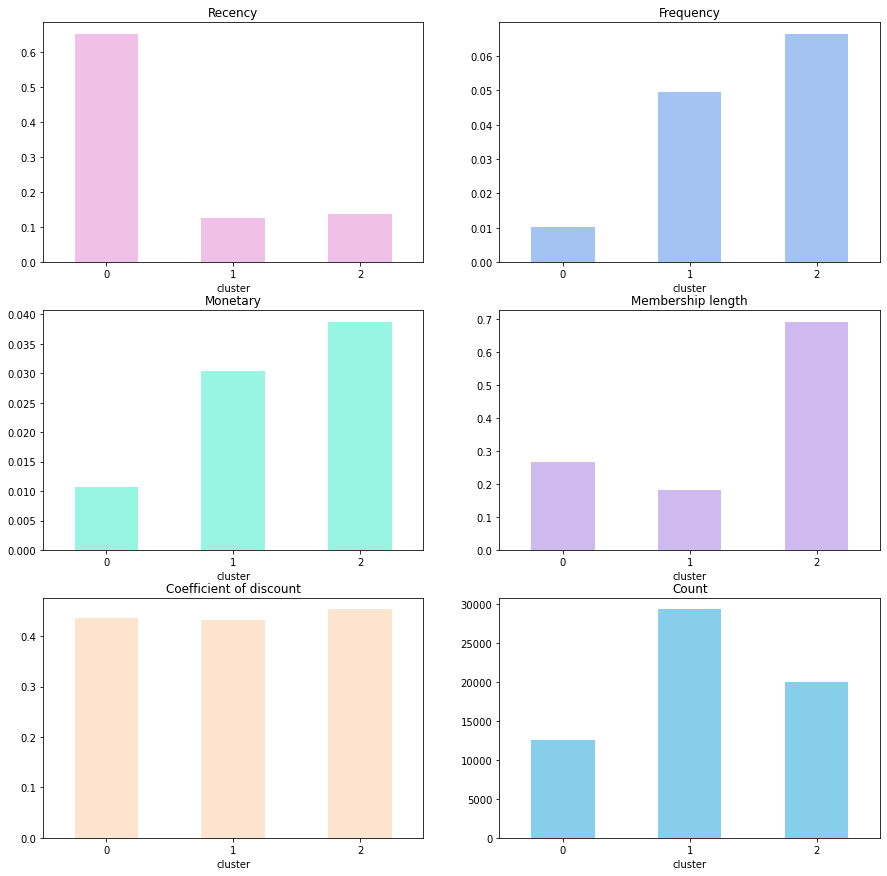

In [71]:
fig, ax = plt.subplots(3,2, figsize=(15,15))
cluster_df['R'].plot(kind='bar', rot=0, ax=ax[0,0], title='Recency', color='#f1c0e8')
cluster_df['F'].plot(kind='bar', rot=0, ax=ax[0,1], title='Frequency', color='#a3c4f3')
cluster_df['M'].plot(kind='bar', rot=0, ax=ax[1,0], title='Monetary', color='#98f5e1')
cluster_df['L'].plot(kind='bar', rot=0, ax=ax[1,1], title='Membership length', color='#cfbaf0')
cluster_df['C'].plot(kind='bar', rot=0, ax=ax[2,0], title='Coefficient of discount', color='#fde4cf')
cluster_df['count'].plot(kind='bar', rot=0, ax=ax[2,1], title='Count', color='skyblue')

- Cluster 0:<br>
Highest recency, lowest frequency, lowest monetary, second lowest membership length
<br>
- Cluster 1:<br>
Lowest recency, second highest frequency, second highest monetary, lowest membership length
<br>
- Cluster 2:<br>
Second lowest recency, highest frequency, highest monetary, highest membership length
- Overall, they have equal average of coefficient of discounts

<b>Cluster 0</b> are customers with low membership length, low total kilometers, low frequency, but high recency. They are probably new customers. Increase brand awareness among them.
<b>Cluster 1</b> are customers with low recency and membership length, but they took many flights before and have high total kilometers. This company might be at risk of losing them. Make limited-time offers and give personalized recommendations.
<b>Cluster 2</b> are customers with high membership length, total kilometers, and frequency, but they didn't take flights recently. They might be loyal customers. Try to retain these customers by sending personalized discounts, offer membership program, and collecting feedbacks.